## Kernel PCA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X.shape = (400, 2)
y.shape = (400,)


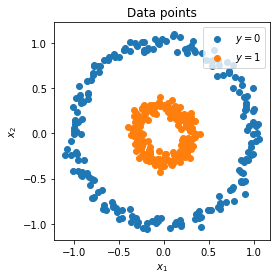

In [2]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X[y == 0, 0], X[y == 0, 1], label="$y=0$")
ax.scatter(X[y == 1, 0], X[y == 1, 1], label="$y=1$")
ax.legend()
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Data points")
fig.tight_layout()

Now, we project the data randomly in a larger dimension

In [3]:
# random projection
n_projections = 10000
F = np.random.randn(2, n_projections) * np.sqrt(5)
print(f"F.shape = {F.shape}")
# random feature map
X_rks = np.hstack((np.cos(X@F), np.sin(X@F))) / np.sqrt(n_projections)
print(f"X_rks.shape = {X_rks.shape}")

F.shape = (2, 10000)
X_rks.shape = (400, 20000)


All right, now we have the original data, and the data in the new space, it is time to do a PCA

In [4]:
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)
X_rks_pca = pca.fit_transform(X_rks)
print(f"X_pca.shape = {X_pca.shape}")
print(f"X_rks_pca.shape = {X_rks_pca.shape}")

X_pca.shape = (400, 2)
X_rks_pca.shape = (400, 2)


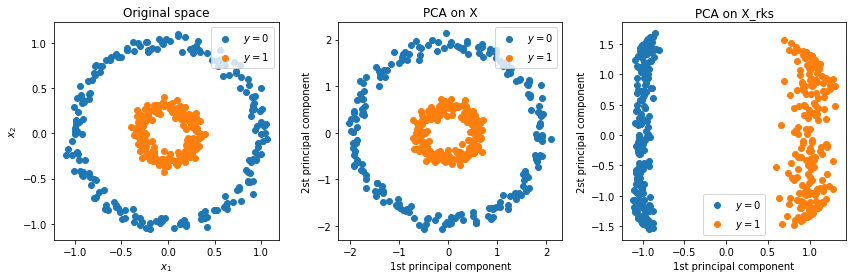

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
arrays = [X, X_pca, X_rks_pca]
titles = ["Original space", "PCA on X", "PCA on X_rks"]
xlabels = ["$x_1$", "1st principal component", "1st principal component"]
ylabels = ["$x_2$", "2st principal component", "2st principal component"]
for ax, array, title, xlabel, ylabel in zip(axs, arrays, titles, xlabels, ylabels):
    ax.scatter(array[y == 0, 0], array[y == 0, 1], label="$y=0$")
    ax.scatter(array[y == 1, 0], array[y == 1, 1], label="$y=1$")
    ax.legend()
    ax.set(xlabel = xlabel, ylabel = ylabel, title = title)
fig.tight_layout()

Of course, we could also used Kernel PCA directly. Since PCA is just an eigenvalue search on the matrix $XX^T$, this simply means one needs to work with the matrix $X^TX$

In [6]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

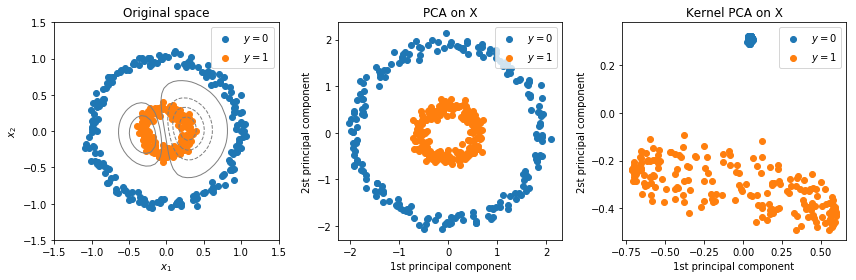

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
arrays = [X, X_pca, X_kpca]
titles = ["Original space", "PCA on X", "Kernel PCA on X"]
xlabels = ["$x_1$", "1st principal component", "1st principal component"]
ylabels = ["$x_2$", "2st principal component", "2st principal component"]
for ax, array, title, xlabel, ylabel in zip(axs, arrays, titles, xlabels, ylabels):
    ax.scatter(array[y == 0, 0], array[y == 0, 1], label="$y=0$")
    ax.scatter(array[y == 1, 0], array[y == 1, 1], label="$y=1$")
    ax.legend()
    ax.set(xlabel = xlabel, ylabel = ylabel, title = title)
# contour plot in original space
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
axs[0].contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
fig.tight_layout()